In [1]:
import os
import sys
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2
#from google.colab import drive
#drive.mount('/content/drive')
path = 'c:/Users/emili/Documents/complex-frogs/cs3220_A4/cs3220_A4_src' #@param {type: "string"}
sys.path.append(path)

1. Generate a random maze with size (7,7), as a Numpy matrix, which includes 25% of occupied cells (walls).

In [2]:
import numpy as np 
import math
import random
size = (7,7)
mazeRand = np.random.choice([0,1], size=size, p=[0.25, 0.75]) #0 = wall
mazeRand

array([[1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

2. Build the maze state space

[[1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1]
 [1 1 1 1 0 1 0]
 [1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1]]


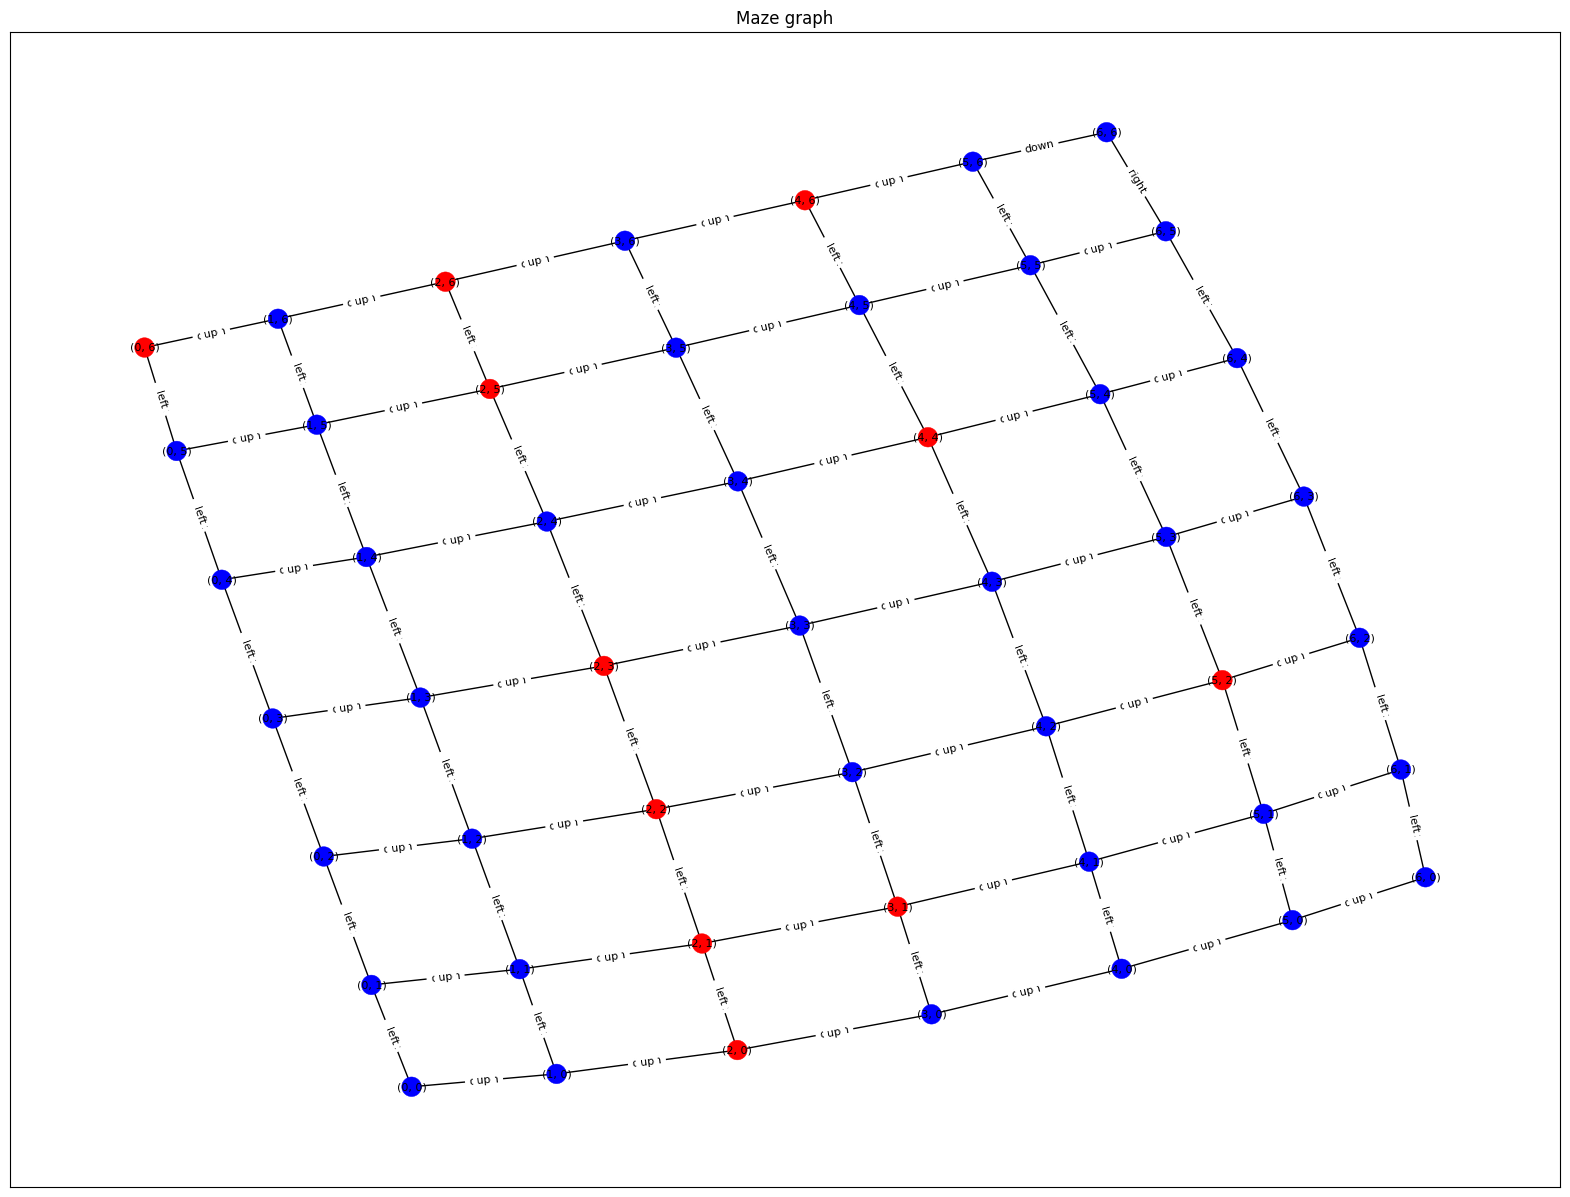

In [3]:
from mazeData import *
from mazeGraphClass import mazeGraph
from visualizations import simple_visualization

mazeActs=defineMazeActions(mazeRand)
maze=makeMazeTransformationModel(mazeActs)
res=mazeStatesLocations(7)
mazeWorldGraph=mazeGraph(maze, mazeStatesLocations(7))
simple_visualization(mazeWorldGraph, mazeRand)

[[1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1]
 [1 1 1 1 0 1 0]
 [1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1]]
38
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 4), (3, 0), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (5, 0), (5, 1), (5, 3), (5, 4), (5, 5), (5, 6), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
100 38


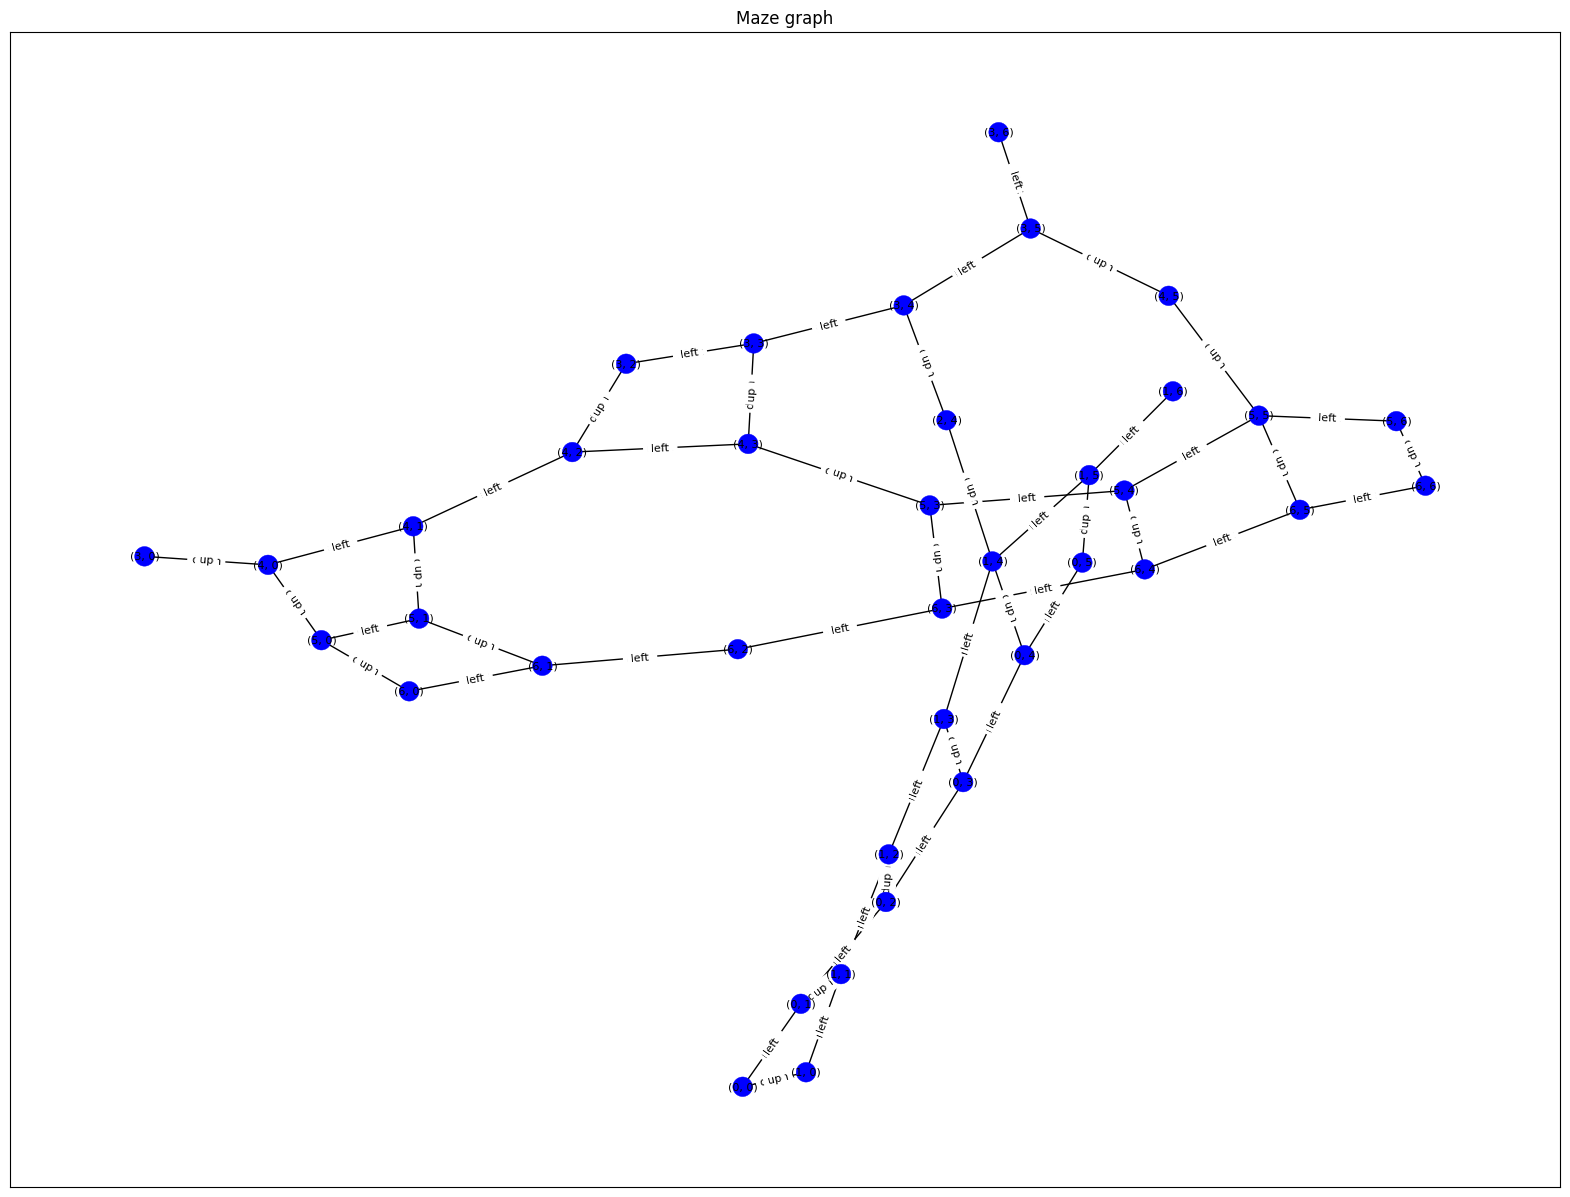

In [4]:
from visualizations import simple_visualization1
mazeAvailableActs=defineMazeAvailableActions(mazeRand)
maze1=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldGraph1=mazeGraph(maze1, mazeStatesLocations(7))
simple_visualization1(mazeWorldGraph1, mazeRand)

3. Develop transition model where:
- The Rat-Agent is allowed to move only on free cells by using the following actions: *left, up, right, down*.
- Since the Maze is 7-story building different actions have different costs: left/right: -2 (from Agent's performance); down:-1; up:-4.

In [5]:
class mazeGraph2(mazeGraph):
  
  def make_graph(stateSpace):
    transModel = {}
    for x in stateSpace.keys():
      for (action, y) in stateSpace[x].items():
        if action == 'left' or action == 'right':
          transModel.setdefault(x, {})[y] = 2
        elif action == 'up':
          transModel.setdefault(x, {})[y] = 4
        elif action == 'down':
          transModel.setdefault(x, {})[y] = 1
    return transModel
    

4. Implement 2 Rat-Agents (based on Uniform-cost  and BreadthFirst Search algoritms) and apply them (separately) to find out which one is more productive for getting cheese (which Agent spends less peformance to get cheese).
* for Uniform-cost Search apply BEST-FIRST-SEARCH
with PATH-COST as the evaluation function
* PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.

In [6]:
from nodeClass import Node
from queue import PriorityQueue
from collections import deque
    

def UniformCost():
    
        
    def program(problem):

        node = Node(problem.initial)
        frontier = PriorityQueue()
        frontier.put((node.path_cost, node))
        reached = {problem.initial: node}

        while frontier:
            node = frontier.get()[1]
            print("The node {} is extracted from frontier:".format(node.state))

            if problem.goal_test(node.state):
                print("We have found our goal: {}, the final cost is {}".format (node.state, node.path_cost))
                return node
            
            for child in node.expand(problem):
                if child.state not in reached or child.path_cost < reached[child.state].path_cost:
                    print("The child node {} with cost {}".format(child, child.path_cost))
                    frontier.put((child.path_cost, child))
                    reached.update({child.state: child})
            
        return None

    return program


In [7]:
from mazeProblemSolvingAgentProClass import MazeProblemSolvingAgentPro
from agents import *

initState = (0,0)
goalState = (6,6)

uniformAgent = MazeProblemSolvingAgentPro(initState,mazeWorldGraph1,goalState, UniformCost())
print(uniformAgent((0,0)))

The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)> with cost 2
The child node <Node (1, 0)> with cost 1
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)> with cost 3
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)> with cost 4
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)> with cost 5
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)> with cost 6
The node (1, 2) is extracted from frontier:
The child node <Node (1, 3)> with cost 7
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)> with cost 8
The node (1, 3) is extracted from frontier:
The child node <Node (1, 4)> with cost 9
The node (0, 4) is extracted from frontier:
The child node <Node (0, 5)> with cost 10
The node (1, 4) is extracted from frontier:
The child node <Node (1, 5)> with cost 11
The child node <Node (2, 4)> with cost 10
The node (0, 5) is extracted from frontier:
The node (2, 4) is ex

In [8]:
breadthAgent = ProblemSolvingMazeAgentBREADTH_FS(initState,mazeWorldGraph1,goalState)
print(breadthAgent((0,0)))

Reached: {(0, 0)} 
Frontier: deque([<Node (0, 0)>]) 
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Reached: {(0, 1), (1, 0), (0, 0)} 
Frontier: deque([<Node (0, 1)>, <Node (1, 0)>]) 
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
Reached: {(0, 1), (0, 0), (1, 1), (0, 2), (1, 0)} 
Frontier: deque([<Node (1, 0)>, <Node (0, 2)>, <Node (1, 1)>]) 
The node (1, 0) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (1, 1)>.
Reached: {(0, 1), (0, 0), (1, 1), (0, 2), (1, 0)} 
Frontier: deque([<Node (0, 2)>, <Node (1, 1)>]) 
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
Reached: {(0, 1), (1, 2), (0, 0), (1, 1), (0, 3), (0, 2), (1, 0)} 
Frontier: deque([<Node (1, 1)>, <Node (0, 3)>, <Node (1, 2)>]) 
The node (1, 1) is extracted from frontie

5. Visualize the 2 search trees accordingly.

In [9]:
def UniformCostShow():
    #with BFS we choose a node, n, with minimum value of some evaluation function, f (n).
    
    def program(problem):
        #print(111)
        steps = 0
        allNodeColors = []
        nodeColors = {k : 'white' for k in problem.graph.nodes()}

        node = Node(problem.initial)
        nodeColors[node.state] = "yellow"
        steps += 1
        allNodeColors.append(dict(nodeColors))

        #print(node.state)
        frontier = PriorityQueue()
        frontier.put((node.path_cost,node))

        nodeColors[node.state] = "orange"
        steps += 1
        allNodeColors.append(dict(nodeColors))



        reached = {problem.initial:node}

        while not frontier.empty():
            node = frontier.get()[1]
            print("The node {} is extracted from frontier:".format(node.state))
            nodeColors[node.state] = "red"
            steps += 1
            allNodeColors.append(dict(nodeColors))

            if problem.goal_test(node.state):
                nodeColors[node.state] = "green"
                steps += 1
                allNodeColors.append(dict(nodeColors))
                return (node,steps,allNodeColors)

            for child in node.expand(problem):
                if child.state not in reached or child.path_cost < reached[child.state].path_cost:
                    print("The child node {} with cost {}".format(child, child.path_cost))
                    frontier.put((child.path_cost,child))
                    nodeColors[child.state] = "orange"
                    steps += 1
                    allNodeColors.append(dict(nodeColors))

                    reached.update({child.state:child})

            # modify the color of explored nodes to blue
            nodeColors[node.state] = "blue"
            steps += 1
            allNodeColors.append(dict(nodeColors))
        print("No solution...")
            
        return None,steps,allNodeColors

    return program


def BreadthFirstSearchGraphShow():
    def program(problem):
        steps = 0
        allNodeColors = []
        nodeColors = {k : 'white' for k in problem.graph.nodes()}

        node = Node(problem.initial)
        nodeColors[node.state] = "yellow"
        steps += 1
        allNodeColors.append(dict(nodeColors))
        #early goal test
        if problem.goal_test(node.state):
            nodeColors[node.state] = "green"
            steps += 1
            allNodeColors.append(dict(nodeColors))
            return (node,steps,allNodeColors)
    
        frontier = deque()#FIFO
        frontier.append(node)
        reached = set()
        reached.add(node.state)
    
        while frontier:
            print("Reached: {} ".format(reached))
            print("Frontier: {} ".format(frontier))
            node = frontier.popleft()#FIFO
            print("The node {} is extracted from frontier:".format(node.state))
            nodeColors[node.state] = "red"
            steps += 1
            allNodeColors.append(dict(nodeColors))
        
            for child in node.expand(problem):
                print("The child node {}.".format(child))
                if problem.goal_test(child.state):
                    nodeColors[child.state] = "green"
                    steps += 1
                    allNodeColors.append(dict(nodeColors))
                    return (node,steps,allNodeColors)

                if child.state not in reached:
                    reached.add(child.state)
                    frontier.append(child)
                    nodeColors[child.state] = "orange"
                    steps += 1
                    allNodeColors.append(dict(nodeColors))
                    
            nodeColors[node.state] = "blue"
            steps += 1
            allNodeColors.append(dict(nodeColors))
        print("No solution...")
            
        return None,steps,allNodeColors

    return program


In [10]:
from mazeProblemSolvingAgentProDrawClass import MazeProblemSolvingAgentProDraw
uniformAgent2 = MazeProblemSolvingAgentProDraw(initState, mazeWorldGraph1, goalState, UniformCostShow())
breadthAgent2 = MazeProblemSolvingAgentProDraw(initState, mazeWorldGraph1, goalState, BreadthFirstSearchGraphShow())

uniColours = uniformAgent2.work(initState)
uniColours

The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)> with cost 2
The child node <Node (1, 0)> with cost 1
The node (1, 0) is extracted from frontier:
The child node <Node (1, 1)> with cost 3
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)> with cost 4
The node (1, 1) is extracted from frontier:
The child node <Node (1, 2)> with cost 5
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)> with cost 6
The node (1, 2) is extracted from frontier:
The child node <Node (1, 3)> with cost 7
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)> with cost 8
The node (1, 3) is extracted from frontier:
The child node <Node (1, 4)> with cost 9
The node (0, 4) is extracted from frontier:
The child node <Node (0, 5)> with cost 10
The node (1, 4) is extracted from frontier:
The child node <Node (1, 5)> with cost 11
The child node <Node (2, 4)> with cost 10
The node (0, 5) is extracted from frontier:
The node (2, 4) is ex

{(4, 0): 'orange',
 (5, 4): 'blue',
 (4, 6): 'white',
 (5, 1): 'orange',
 (0, 5): 'blue',
 (2, 2): 'white',
 (1, 0): 'blue',
 (6, 2): 'blue',
 (4, 2): 'blue',
 (3, 0): 'white',
 (5, 6): 'blue',
 (3, 6): 'blue',
 (5, 3): 'blue',
 (2, 4): 'blue',
 (1, 2): 'blue',
 (0, 4): 'blue',
 (2, 1): 'white',
 (6, 4): 'blue',
 (3, 2): 'blue',
 (4, 1): 'blue',
 (5, 5): 'blue',
 (0, 0): 'blue',
 (1, 4): 'blue',
 (0, 6): 'white',
 (2, 3): 'white',
 (6, 6): 'green',
 (6, 3): 'blue',
 (3, 4): 'blue',
 (4, 3): 'blue',
 (3, 1): 'white',
 (0, 2): 'blue',
 (1, 6): 'blue',
 (2, 5): 'white',
 (1, 3): 'blue',
 (6, 5): 'blue',
 (4, 5): 'blue',
 (3, 3): 'blue',
 (5, 0): 'white',
 (0, 1): 'blue',
 (1, 5): 'blue',
 (6, 1): 'orange',
 (3, 5): 'blue',
 (5, 2): 'white',
 (4, 4): 'white',
 (1, 1): 'blue',
 (0, 3): 'blue',
 (2, 0): 'white',
 (2, 6): 'white',
 (6, 0): 'white'}

In [11]:
breadthColours = breadthAgent2.work(initState)
breadthColours

Reached: {(0, 0)} 
Frontier: deque([<Node (0, 0)>]) 
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Reached: {(0, 1), (1, 0), (0, 0)} 
Frontier: deque([<Node (0, 1)>, <Node (1, 0)>]) 
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
Reached: {(0, 1), (0, 0), (1, 1), (0, 2), (1, 0)} 
Frontier: deque([<Node (1, 0)>, <Node (0, 2)>, <Node (1, 1)>]) 
The node (1, 0) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (1, 1)>.
Reached: {(0, 1), (0, 0), (1, 1), (0, 2), (1, 0)} 
Frontier: deque([<Node (0, 2)>, <Node (1, 1)>]) 
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
Reached: {(0, 1), (1, 2), (0, 0), (1, 1), (0, 3), (0, 2), (1, 0)} 
Frontier: deque([<Node (1, 1)>, <Node (0, 3)>, <Node (1, 2)>]) 
The node (1, 1) is extracted from frontie

{(4, 0): 'orange',
 (5, 4): 'blue',
 (4, 6): 'white',
 (5, 1): 'orange',
 (0, 5): 'blue',
 (2, 2): 'white',
 (1, 0): 'blue',
 (6, 2): 'orange',
 (4, 2): 'blue',
 (3, 0): 'white',
 (5, 6): 'red',
 (3, 6): 'blue',
 (5, 3): 'blue',
 (2, 4): 'blue',
 (1, 2): 'blue',
 (0, 4): 'blue',
 (2, 1): 'white',
 (6, 4): 'orange',
 (3, 2): 'blue',
 (4, 1): 'blue',
 (5, 5): 'blue',
 (0, 0): 'blue',
 (1, 4): 'blue',
 (0, 6): 'white',
 (2, 3): 'white',
 (6, 6): 'green',
 (6, 3): 'blue',
 (3, 4): 'blue',
 (4, 3): 'blue',
 (3, 1): 'white',
 (0, 2): 'blue',
 (1, 6): 'blue',
 (2, 5): 'white',
 (1, 3): 'blue',
 (6, 5): 'orange',
 (4, 5): 'blue',
 (3, 3): 'blue',
 (5, 0): 'white',
 (0, 1): 'blue',
 (1, 5): 'blue',
 (6, 1): 'white',
 (3, 5): 'blue',
 (5, 2): 'white',
 (4, 4): 'white',
 (1, 1): 'blue',
 (0, 3): 'blue',
 (2, 0): 'white',
 (2, 6): 'white',
 (6, 0): 'white'}

[[1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1]
 [1 1 1 1 0 1 0]
 [1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1]]
{(4, 0): 'orange', (5, 4): 'blue', (4, 6): 'white', (5, 1): 'orange', (0, 5): 'blue', (2, 2): 'white', (1, 0): 'blue', (6, 2): 'blue', (4, 2): 'blue', (3, 0): 'white', (5, 6): 'blue', (3, 6): 'blue', (5, 3): 'blue', (2, 4): 'blue', (1, 2): 'blue', (0, 4): 'blue', (2, 1): 'white', (6, 4): 'blue', (3, 2): 'blue', (4, 1): 'blue', (5, 5): 'blue', (0, 0): 'blue', (1, 4): 'blue', (0, 6): 'white', (2, 3): 'white', (6, 6): 'green', (6, 3): 'blue', (3, 4): 'blue', (4, 3): 'blue', (3, 1): 'white', (0, 2): 'blue', (1, 6): 'blue', (2, 5): 'white', (1, 3): 'blue', (6, 5): 'blue', (4, 5): 'blue', (3, 3): 'blue', (5, 0): 'white', (0, 1): 'blue', (1, 5): 'blue', (6, 1): 'orange', (3, 5): 'blue', (5, 2): 'white', (4, 4): 'white', (1, 1): 'blue', (0, 3): 'blue', (2, 0): 'white', (2, 6): 'white', (6, 0): 'white'}
{(4, 0): 'orange', (5, 4): 'blue', (4, 6): 'white', (5, 1): 'orange', (0, 

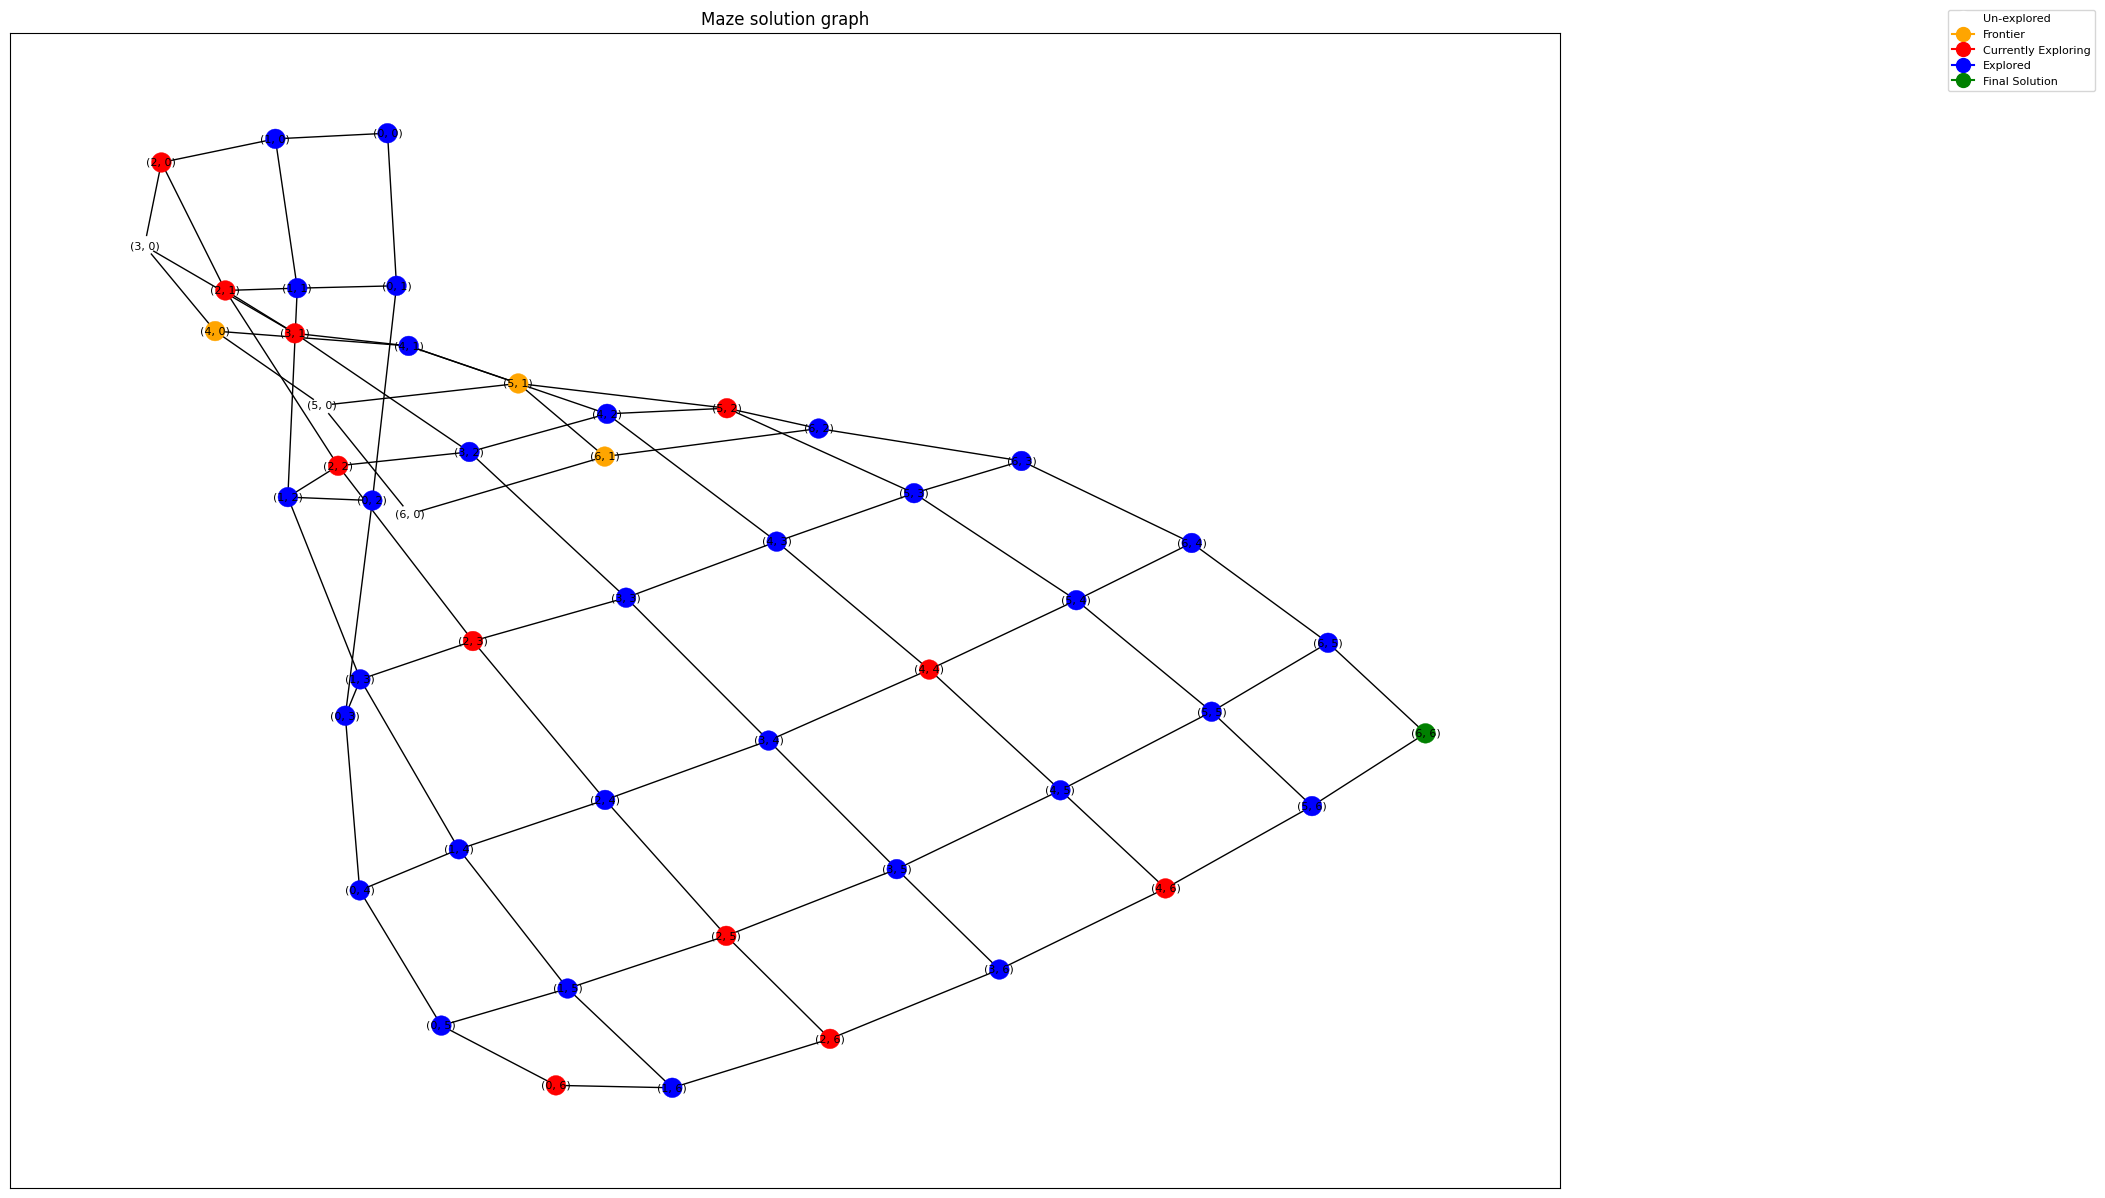

In [12]:
from visualizations import drawSearchTree
drawSearchTree(mazeWorldGraph, mazeRand, uniColours)

[[1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1]
 [1 1 1 1 0 1 0]
 [1 1 0 1 1 1 1]
 [1 1 1 1 1 1 1]]
{(4, 0): 'orange', (5, 4): 'blue', (4, 6): 'white', (5, 1): 'orange', (0, 5): 'blue', (2, 2): 'white', (1, 0): 'blue', (6, 2): 'orange', (4, 2): 'blue', (3, 0): 'white', (5, 6): 'red', (3, 6): 'blue', (5, 3): 'blue', (2, 4): 'blue', (1, 2): 'blue', (0, 4): 'blue', (2, 1): 'white', (6, 4): 'orange', (3, 2): 'blue', (4, 1): 'blue', (5, 5): 'blue', (0, 0): 'blue', (1, 4): 'blue', (0, 6): 'white', (2, 3): 'white', (6, 6): 'green', (6, 3): 'blue', (3, 4): 'blue', (4, 3): 'blue', (3, 1): 'white', (0, 2): 'blue', (1, 6): 'blue', (2, 5): 'white', (1, 3): 'blue', (6, 5): 'orange', (4, 5): 'blue', (3, 3): 'blue', (5, 0): 'white', (0, 1): 'blue', (1, 5): 'blue', (6, 1): 'white', (3, 5): 'blue', (5, 2): 'white', (4, 4): 'white', (1, 1): 'blue', (0, 3): 'blue', (2, 0): 'white', (2, 6): 'white', (6, 0): 'white'}
{(4, 0): 'orange', (5, 4): 'blue', (4, 6): 'white', (5, 1): 'orange', 

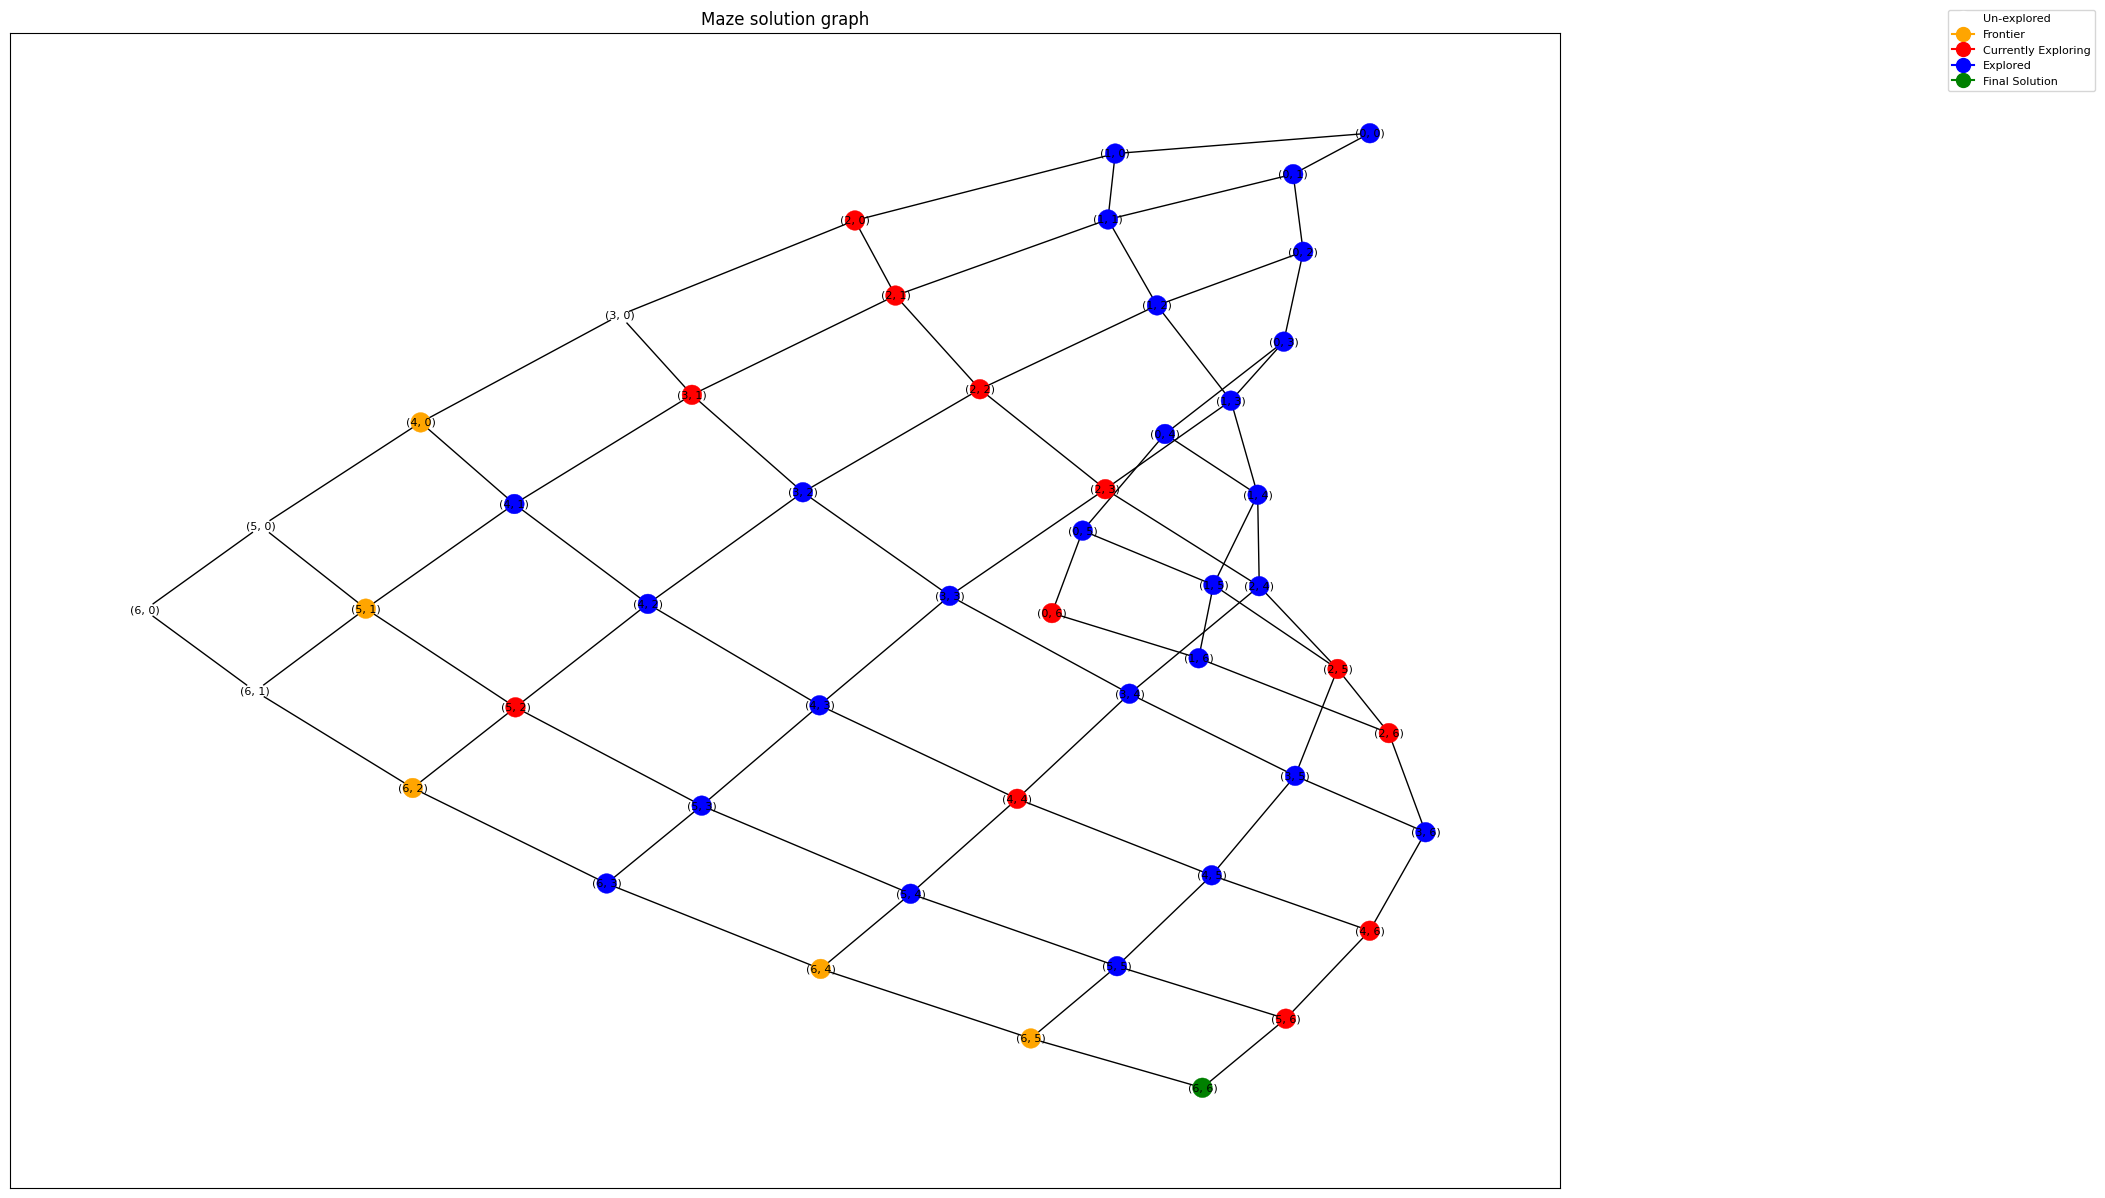

In [13]:
drawSearchTree(mazeWorldGraph, mazeRand, breadthColours)

6. Let's assume that the Rat-Agent (being in the initial state [0,0]) figured out (probably he could smell it) that the cheese is at the top of the Maze.
* place the cheese in random cell but above 4th level (row) of the Maze
* implement 2 search programs (based on Depth-first and Depth-limited strategies) for 2 to Rat-Agents and determine which Agent (DFS-based or DLS-base) will find the cheese faster (assuming that one move in the Maze takes 1 sec.)

In [23]:
cheese = (random.randint(0,3), random.randint(0,6)) #includes floor 4
mazeRandCheese = mazeRand.copy()
mazeRandCheese[cheese[0]][cheese[1]] = 2
mazeRandCheese

array([[1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

In [24]:
#new world graph in the case cheese placement was previously a wall
mazeAvailableActs=defineMazeAvailableActions(mazeRandCheese)
maze2=makeMazeTransformationModel(mazeAvailableActs)
mazeWorldCheeseGraph=mazeGraph(maze1, mazeStatesLocations(7))

In [34]:

def DepthFirst():
    def program(problem):
        sec = 0
        node = Node(problem.initial)
        if problem.goal_test(node.state):
            print("We have found our goal: {}".format (node.state))
            return node
        
        #similar to breadth first in a way
        stack = deque() 
        stack.appendleft(node)
        visited = set()
        
        while not len(stack) == 0:
            print("Visited: {} ".format(visited))
            print("Stack: {} ".format(stack))
            node = stack.pop()
            sec += 1
            print("The node {} is popped from the stack:".format(node.state))
            visited.add(node.state)
            print()
            
            if problem.goal_test(node.state):
                print("We have found our goal: {} in {} seconds".format (node.state, sec))
                return node
            
            for child in node.expand(problem):
                if child.state not in visited and child not in stack:
                    stack.appendleft(child)
                    print("The child node {} is pushed onto the stack.".format(child))
                    
        return None
        
    return program
            

In [ ]:

def DepthLimited():
    def program(problem, depth_limit = 4):
        sec = 0
        node = Node(problem.initial)
        if problem.goal_test(node.state):
            print("We have found our goal: {}".format (node.state))
            return node
        
        #similar to breadth first in a way
        stack = deque() 
        stack.appendleft((node, 0))
        visited = set()
        
        while not len(stack) == 0:
            print("Visited: {} ".format(visited))
            print("Stack: {} ".format(stack))
            node, depth = stack.pop()
            sec += 1
            print("The node {} is popped from the stack:".format(node.state))
            visited.add(node.state)
            print()
            
            if problem.goal_test(node.state):
                print("We have found our goal: {} in {} seconds".format (node.state, sec))
                return node
            
            if depth < depth_limit:
                for child in node.expand(problem):
                    if child.state not in visited and child not in stack:
                        stack.appendleft((child, depth + 1))
                        print("The child node {} is pushed onto the stack.".format(child))
            
            else:
                print("cutoff")
                
        print("Failure to find goal within limit. Final time = {} seconds".format(sec))  
        return None
    
    return program


In [36]:
initState = (0,0)
goalState = cheese

dfsAgent = MazeProblemSolvingAgentPro(initState, mazeWorldCheeseGraph, goalState, DepthFirst())
print(dfsAgent(initState))

Visited: set() 
Stack: deque([<Node (0, 0)>]) 
The node (0, 0) is popped from the stack:

The child node <Node (0, 1)> is pushed onto the stack.
The child node <Node (1, 0)> is pushed onto the stack.
Visited: {(0, 0)} 
Stack: deque([<Node (1, 0)>, <Node (0, 1)>]) 
The node (0, 1) is popped from the stack:

The child node <Node (0, 2)> is pushed onto the stack.
The child node <Node (1, 1)> is pushed onto the stack.
Visited: {(0, 1), (0, 0)} 
Stack: deque([<Node (1, 1)>, <Node (0, 2)>, <Node (1, 0)>]) 
The node (1, 0) is popped from the stack:

Visited: {(0, 1), (1, 0), (0, 0)} 
Stack: deque([<Node (1, 1)>, <Node (0, 2)>]) 
The node (0, 2) is popped from the stack:

The child node <Node (0, 3)> is pushed onto the stack.
The child node <Node (1, 2)> is pushed onto the stack.
Visited: {(0, 1), (1, 0), (0, 2), (0, 0)} 
Stack: deque([<Node (1, 2)>, <Node (0, 3)>, <Node (1, 1)>]) 
The node (1, 1) is popped from the stack:

Visited: {(0, 1), (0, 0), (1, 1), (0, 2), (1, 0)} 
Stack: deque([<Node

In [37]:
dlsAgent = MazeProblemSolvingAgentPro(initState, mazeWorldCheeseGraph, goalState, DepthLimited())
print(dlsAgent(initState))

Visited: set() 
Stack: deque([(<Node (0, 0)>, 0)]) 
The node (0, 0) is popped from the stack:

The child node <Node (0, 1)> is pushed onto the stack.
The child node <Node (1, 0)> is pushed onto the stack.
Visited: {(0, 0)} 
Stack: deque([(<Node (1, 0)>, 1), (<Node (0, 1)>, 1)]) 
The node (0, 1) is popped from the stack:

The child node <Node (0, 2)> is pushed onto the stack.
The child node <Node (1, 1)> is pushed onto the stack.
Visited: {(0, 1), (0, 0)} 
Stack: deque([(<Node (1, 1)>, 2), (<Node (0, 2)>, 2), (<Node (1, 0)>, 1)]) 
The node (1, 0) is popped from the stack:

The child node <Node (1, 1)> is pushed onto the stack.
Visited: {(0, 1), (1, 0), (0, 0)} 
Stack: deque([(<Node (1, 1)>, 2), (<Node (1, 1)>, 2), (<Node (0, 2)>, 2)]) 
The node (0, 2) is popped from the stack:

The child node <Node (0, 3)> is pushed onto the stack.
The child node <Node (1, 2)> is pushed onto the stack.
Visited: {(0, 1), (1, 0), (0, 2), (0, 0)} 
Stack: deque([(<Node (1, 2)>, 3), (<Node (0, 3)>, 3), (<Nod